In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
train = pd.read_csv("E:\Data.csv")

In [5]:
print("***** Train_Set *****")
print(train.head())
print("\n")

***** Train_Set *****
     State  Rank                    Make/Model  Model Year  Thefts
0  Alabama     1  Chevrolet Pickup (Full Size)        2005     499
1  Alabama     2       Ford Pickup (Full Size)        2006     357
2  Alabama     3                  Toyota Camry        2014     205
3  Alabama     4                 Nissan Altima        2014     191
4  Alabama     4              Chevrolet Impala        2004     191




In [6]:
print("***** Train_Set *****")
print(train.describe())
print("\n")

***** Train_Set *****
             Rank   Model Year        Thefts
count  510.000000   510.000000    510.000000
mean     5.347059  2002.962745    477.896078
std      2.772150     6.197834   1888.652836
min      1.000000  1989.000000      5.000000
25%      3.000000  1998.000000     68.250000
50%      5.000000  2002.000000    186.000000
75%      8.000000  2006.000000    405.750000
max     10.000000  2015.000000  28345.000000




In [7]:
print(train.columns.values)

['State' 'Rank' 'Make/Model' 'Model Year' 'Thefts']


In [8]:
train.isna().head()

,State,Rank,Make/Model,Model Year,Thefts
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [9]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")

*****In the train set*****
State         0
Rank          0
Make/Model    0
Model Year    0
Thefts        0
dtype: int64




In [10]:
train = train.applymap(lambda Charge_Type: 1 if Charge_Type == True else Charge_Type)
train = train.applymap(lambda Charge_Type: 0 if Charge_Type == False else Charge_Type)

In [11]:
train.fillna(train.mean(), inplace=True)

In [12]:
print(train.isna().sum())

State         0
Rank          0
Make/Model    0
Model Year    0
Thefts        0
dtype: int64


In [13]:
train[["State", "Thefts"]].groupby(['State'], as_index=False).mean().sort_values(by='Thefts', ascending=False)

,State,Thefts
4,California,8676.8
43,Texas,2543.3
47,Washington,1100.8
9,Florida,966.4
10,Georgia,649.7
5,Colorado,529.0
2,Arizona,527.0
13,Illinois,501.5
22,Michigan,494.6
37,Oregon,455.6


In [14]:
train[["State", "Rank"]].groupby(['State'], as_index=False).mean().sort_values(by='Rank', ascending=False)

,State,Rank
25,Missouri,5.5
33,North Carolina,5.5
24,Mississippi,5.5
1,Alaska,5.5
26,Montana,5.5
27,Nebraska,5.5
28,Nevada,5.5
30,New Jersey,5.5
31,New Mexico,5.5
32,New York,5.5


In [15]:
train[["Make/Model", "Thefts"]].groupby(['Make/Model'], as_index=False).mean().sort_values(by='Thefts', ascending=False)

,Make/Model,Thefts
31,Honda Civic,1296.405405
29,Honda Accord,1127.717391
0,Acura Integra,921.333333
6,Chevrolet Pickup (Full Size),611.733333
24,Ford Pickup (Full Size),606.125000
38,Nissan Sentra,599.333333
13,Dodge Charger,477.000000
9,Chevrolet Trailblazer,462.000000
12,Dodge Caravan,402.875000
22,Ford Fusion,355.000000


In [16]:
train[["Make/Model", "Rank"]].groupby(['Make/Model'], as_index=False).mean().sort_values(by='Rank', ascending=False)

,Make/Model,Rank
33,Hyundai Sonata,10.000000
1,Acura TL,10.000000
22,Ford Fusion,10.000000
44,Toyota Avalon,10.000000
8,Chevrolet Tahoe,9.250000
39,Pontiac Grand Am,9.000000
10,Chrysler 300/300M,9.000000
40,Pontiac Grand Prix,8.333333
30,Honda CR-V,8.222222
20,Ford Explorer,8.222222


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 5 columns):
State         510 non-null object
Rank          510 non-null int64
Make/Model    510 non-null object
Model Year    510 non-null int64
Thefts        510 non-null int64
dtypes: int64(3), object(2)
memory usage: 20.0+ KB


In [20]:
y = np.array(train['State'])

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 5 columns):
State         510 non-null object
Rank          510 non-null int64
Make/Model    510 non-null object
Model Year    510 non-null int64
Thefts        510 non-null int64
dtypes: int64(3), object(2)
memory usage: 20.0+ KB


In [22]:
kmeans = KMeans(n_clusters=2)

In [23]:
kmeans.fit(X)

NameError: name 'X' is not defined

In [25]:
correct = 0

In [36]:
data =  pd.read_csv("E:\Data.csv")
cluster_X = data.iloc[:,1:]
cluster_X["Thefts"] = cluster_X["Thefts"].apply(lambda x: float(x.split()[0].replace(',', '')))
cluster_X = cluster_X.values
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(cluster_X)
cluster_X = imputer.transform(cluster_X)

AttributeError: 'int' object has no attribute 'split'

In [38]:
K_Means = KMeans(3)

In [49]:
prediction_dataset = data.copy()
prediction_dataset['cluters'] = 10000

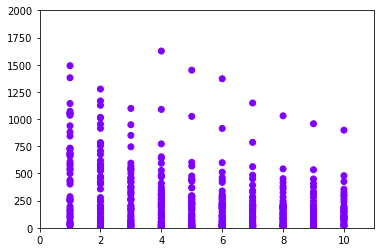

In [56]:
plot.scatter(prediction_dataset['Rank'],prediction_dataset['Thefts'],c=prediction_dataset['cluters'],cmap='rainbow')
plot.xlim(0,11)
plot.ylim(0,2000)
plot.show()